# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [1]:
import pandas as pd
import numpy as np


### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [2]:
# Cell below "1. Start by Importing the dataset into a pandas dataframe."
df_pew = pd.read_csv('CSVs/pew-raw.csv')
print(df_pew.head())

            religion   <$10k   $10-20k  $20-30k  $30-40k   $40-50k  $50-75k
0           Agnostic      27        34       60       81        76      137
1            Atheist      12        27       37       52        35       70
2           Buddhist      27        21       30       34        33       58
3           Catholic     418       617      732      670       638     1116
4  Dont know/refused      15        14       15       11        10       35


2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [3]:
# Cell below "2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches"
print(df_pew.head())      # Display the first 5 rows
print(df_pew.tail())      # Display the last 5 rows
print(df_pew.iloc[0])     # Display the first row using iloc
print(df_pew.loc[0])      # Display the first row using loc

            religion   <$10k   $10-20k  $20-30k  $30-40k   $40-50k  $50-75k
0           Agnostic      27        34       60       81        76      137
1            Atheist      12        27       37       52        35       70
2           Buddhist      27        21       30       34        33       58
3           Catholic     418       617      732      670       638     1116
4  Dont know/refused      15        14       15       11        10       35
                   religion   <$10k   $10-20k  $20-30k  $30-40k   $40-50k  \
5         Evangelical Prot      575       869     1064      982       881   
6                    Hindu        1         9        7        9        11   
7  Historically Black Prot      228       244      236      238       197   
8         Jehovahs Witness       20        27       24       24        21   
9                   Jewish       19        19       25       25        30   

   $50-75k  
5     1486  
6       34  
7      223  
8       30  
9       95  
rel

***What does not seem right in the above dataframe?***

The headers of the cloumns represent ranges, and this will make the data wide, to make the data tidy, we should have ine column for religion, one for income range and one for the count.

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [4]:
# Cell below "3. Try to make the column headers represent a variable not a value. For that, use the `melt` function."
df_pew_melted = pd.melt(df_pew, id_vars=['religion'], var_name='income', value_name='count')
print(df_pew_melted.head())

            religion  income  count
0           Agnostic   <$10k     27
1            Atheist   <$10k     12
2           Buddhist   <$10k     27
3           Catholic   <$10k    418
4  Dont know/refused   <$10k     15


### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [5]:
# Cell below "1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset."
df_billboard = pd.read_csv('CSVs/billboard.csv', encoding='unicode_escape')
print(df_billboard.head())

   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week  ...  \
0  Rock   2000-09-23  2000-11-18         78       63.0       49.0  ...   
1  Rock   2000-02-12  2000-04-08         15        8.0        6.0  ...   
2  Rock   1999-10-23  2000-01-29         71       48.0       43.0  ...   
3  Rock   2000-08-12  2000-09-16         41       23.0       18.0  ...   
4  Rock   2000-08-05  2000-10-14         57       47.0       45.0  ...   

   x67th.week  x68th.week  x69th.week  x70th.week  x71st.week  x72nd.week  \
0         NaN  

2. Observe the first few rows of the dataset.

In [6]:
# Cell below "2. Observe the first few rows of the dataset."
print(df_billboard.head())   # Display the first 5 rows
print(df_billboard.tail())   # Display the last 5 rows

   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week  ...  \
0  Rock   2000-09-23  2000-11-18         78       63.0       49.0  ...   
1  Rock   2000-02-12  2000-04-08         15        8.0        6.0  ...   
2  Rock   1999-10-23  2000-01-29         71       48.0       43.0  ...   
3  Rock   2000-08-12  2000-09-16         41       23.0       18.0  ...   
4  Rock   2000-08-05  2000-10-14         57       47.0       45.0  ...   

   x67th.week  x68th.week  x69th.week  x70th.week  x71st.week  x72nd.week  \
0         NaN  

***What is wrong with the above dataset?***

The dataset is very wide, with each week as a separate column (e.g., "wk1", "wk2", ...). This is not tidy: instead of having a "week" column and a "rank" column, the week numbers are embedded in the column names. This makes analysis and visualization more difficult. The data should be reshaped so each row represents a song-week combination, with columns for song details, week number, and rank.

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [7]:
# Cell below "3. Let's, again, use the `melt` function to fix the general structure of the dataframe."
df_billboard_melted = pd.melt(
    df_billboard,
    id_vars=['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked'],
    var_name='week',
    value_name='rank'
)
print(df_billboard_melted.head())

   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked       week  rank  
0  Rock   2000-09-23  2000-11-18  x1st.week  78.0  
1  Rock   2000-02-12  2000-04-08  x1st.week  15.0  
2  Rock   1999-10-23  2000-01-29  x1st.week  71.0  
3  Rock   2000-08-12  2000-09-16  x1st.week  41.0  
4  Rock   2000-08-05  2000-10-14  x1st.week  57.0  


If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [8]:
# Cell below "Let's try to place only the week number in that column without the extras surronding it."
df_billboard_melted['week'] = df_billboard_melted['week'].str.extract('(\d+)').astype('Int64')
print(df_billboard_melted[['week']].head())

   week
0     1
1     1
2     1
3     1
4     1


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\RAJEH\AppData\Local\Temp\ipykernel_14368\1993332706.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_billboard_melted['week'] = df_billboard_melted['week'].str.extract('(\d+)').astype('Int64')


5. Now let's inspect the ***Week*** column in the dataframe.

In [9]:
# Cell below "5. Now let's inspect the ***Week*** column in the dataframe."
print(df_billboard_melted['week'].unique())    # Show unique week numbers
print(df_billboard_melted['week'].describe())  # Show summary statistics for the week column
print(df_billboard_melted[['week']].head(10))  # Show the first 10 week values

<IntegerArray>
[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
Length: 76, dtype: Int64
count      24092.0
mean          38.5
std      21.937866
min            1.0
25%          19.75
50%           38.5
75%          57.25
max           76.0
Name: week, dtype: Float64
   week
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1


Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



In [10]:
# Cell below "6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*."
df_billboard_melted['date'] = pd.to_datetime(df_billboard_melted['date.entered']) + pd.to_timedelta(df_billboard_melted['week'] - 1, unit='W')
print(df_billboard_melted[['date.entered', 'week', 'date']].head())

  date.entered  week       date
0   2000-09-23     1 2000-09-23
1   2000-02-12     1 2000-02-12
2   1999-10-23     1 1999-10-23
3   2000-08-12     1 2000-08-12
4   2000-08-05     1 2000-08-05


*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


***What is the problem with the calculation above?***

The problem with the calculation above is that it assumes every week follows consecutively from the date.entered, but in reality, some songs may not have ranked every single week (there may be missing weeks or NaN values for some weeks). Also, if the week value is NaN, the resulting date will also be NaT (Not a Time). This can lead to incorrect or missing date values for those rows.

7. Let's only keep necessary columns

In [11]:
# Cell below "7. Let's only keep necessary columns"
df_billboard_clean = df_billboard_melted[['year', 'artist.inverted', 'track', 'week', 'rank', 'date']]
print(df_billboard_clean.head())

   year      artist.inverted                                  track  week  \
0  2000      Destiny's Child               Independent Women Part I     1   
1  2000              Santana                           Maria, Maria     1   
2  2000        Savage Garden                     I Knew I Loved You     1   
3  2000              Madonna                                  Music     1   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)     1   

   rank       date  
0  78.0 2000-09-23  
1  15.0 2000-02-12  
2  71.0 1999-10-23  
3  41.0 2000-08-12  
4  57.0 2000-08-05  


8. How to rename your columns?

In [12]:
# Cell below "8. How to rename your columns?"
df_billboard_clean = df_billboard_melted[['year', 'artist.inverted', 'track', 'week', 'rank', 'date']]
df_billboard_clean = df_billboard_clean.rename(columns={
    'year': 'Year',
    'artist.inverted': 'Artist',
    'track': 'Track',
    'week': 'Week',
    'rank': 'Rank',
    'date': 'Date'
})
print(df_billboard_clean.head())

   Year               Artist                                  Track  Week  \
0  2000      Destiny's Child               Independent Women Part I     1   
1  2000              Santana                           Maria, Maria     1   
2  2000        Savage Garden                     I Knew I Loved You     1   
3  2000              Madonna                                  Music     1   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)     1   

   Rank       Date  
0  78.0 2000-09-23  
1  15.0 2000-02-12  
2  71.0 1999-10-23  
3  41.0 2000-08-12  
4  57.0 2000-08-05  


Display the dataframe

In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

Identify the dataframe to clean (df_billboard_clean).
Decide on a quick cleaning strategy (e.g., drop rows with NaN values).
Apply the cleaning method.
Observe the cleaned dataframe (e.g., print head and check for remaining NaNs).
Write tests to verify:
No NaN values remain after cleaning.
The number of rows is less than or equal to before cleaning.
Data types remain unchanged

In [13]:
# Cell below "Apply quick data cleaning and then observe the dataset"
df_billboard_clean = df_billboard_clean.dropna()
print(df_billboard_clean.head())
print(df_billboard_clean.isnull().sum())

   Year               Artist                                  Track  Week  \
0  2000      Destiny's Child               Independent Women Part I     1   
1  2000              Santana                           Maria, Maria     1   
2  2000        Savage Garden                     I Knew I Loved You     1   
3  2000              Madonna                                  Music     1   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)     1   

   Rank       Date  
0  78.0 2000-09-23  
1  15.0 2000-02-12  
2  71.0 1999-10-23  
3  41.0 2000-08-12  
4  57.0 2000-08-05  
Year      0
Artist    0
Track     0
Week      0
Rank      0
Date      0
dtype: int64


## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [14]:
# Cell below "Start by reading the dataset related to car models: ./CSVs/cars.csv"
df_cars = pd.read_csv('./CSVs/cars.csv')
print(df_cars.head())
print(df_cars.info())

  Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin
0  STRING;DOUBLE;INT;DOUBLE;DOUBLE;DOUBLE;DOUBLE;...                        
1  Chevrolet Chevelle Malibu;;8;307.0;130.0;3504....                        
2   Buick Skylark 320;15.0;8;350.0;;3693.;11.5;70;US                        
3  Plymouth Satellite;;8;318.0;150.0;3436.;11.0;7...                        
4            AMC Rebel SST;16.0;8;;150.0;;12.0;70;US                        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 1 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin  407 non-null    object
dtypes: object(1)
memory usage: 3.3+ KB
None


First Row seems to be the datatype, we need to remove it

In [15]:
# Cell below "First Row seems to be the datatype, we need to remove it"
# Remove the first row if it contains column data types instead of actual data
df_cars = df_cars.iloc[1:].reset_index(drop=True)
print(df_cars.head())

  Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin
0  Chevrolet Chevelle Malibu;;8;307.0;130.0;3504....                        
1   Buick Skylark 320;15.0;8;350.0;;3693.;11.5;70;US                        
2  Plymouth Satellite;;8;318.0;150.0;3436.;11.0;7...                        
3            AMC Rebel SST;16.0;8;;150.0;;12.0;70;US                        
4    Ford Torino;17.0;8;302.0;140.0;3449.;10.5;70;US                        


Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

In [16]:
# Cell below "Let's observe the columns with null values.  Either by using the `isnull().sum()` function"
print(df_cars.isnull().sum())

Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin    0
dtype: int64


There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [17]:
# There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

import numpy as np

missing_percent = (df_cars.isnull().sum() / len(df_cars)) * 100
print(missing_percent)

Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin    0.0
dtype: float64


Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

In [18]:
# Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.
df_cars = df_cars.dropna()
print(df_cars.isnull().sum())
print(df_cars.head())

Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin    0
dtype: int64
  Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin
0  Chevrolet Chevelle Malibu;;8;307.0;130.0;3504....                        
1   Buick Skylark 320;15.0;8;350.0;;3693.;11.5;70;US                        
2  Plymouth Satellite;;8;318.0;150.0;3436.;11.0;7...                        
3            AMC Rebel SST;16.0;8;;150.0;;12.0;70;US                        
4    Ford Torino;17.0;8;302.0;140.0;3449.;10.5;70;US                        


Lets also check dropping the columns

In [19]:
# Lets also check dropping the columns
# Drop columns with any missing values and see how many columns remain
df_cars_dropcol = df_cars.dropna(axis=1)
print(f"Columns remaining after dropping columns with missing values: {df_cars_dropcol.shape[1]}")
print(df_cars_dropcol.head())

Columns remaining after dropping columns with missing values: 1
  Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin
0  Chevrolet Chevelle Malibu;;8;307.0;130.0;3504....                        
1   Buick Skylark 320;15.0;8;350.0;;3693.;11.5;70;US                        
2  Plymouth Satellite;;8;318.0;150.0;3436.;11.0;7...                        
3            AMC Rebel SST;16.0;8;;150.0;;12.0;70;US                        
4    Ford Torino;17.0;8;302.0;140.0;3449.;10.5;70;US                        


Let's observe how many columns we lost

In [20]:
# Let's observe how many columns we lost
original_columns = df_cars.shape[1]
remaining_columns = df_cars_dropcol.shape[1]
print(f"Original columns: {original_columns}, Remaining after drop: {remaining_columns}")
print(f"Columns dropped: {original_columns - remaining_columns}")

Original columns: 1, Remaining after drop: 1
Columns dropped: 0


### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

In [21]:
# Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

# Split the single column into multiple columns if not already done
if 'MPG' not in df_cars.columns:
	df_cars = df_cars['Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin'].str.split(';', expand=True)
	df_cars.columns = ['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']

# Convert MPG to numeric, coercing errors to NaN
df_cars['MPG'] = pd.to_numeric(df_cars['MPG'], errors='coerce')

# Fill missing values with 0
df_cars['MPG'] = df_cars['MPG'].fillna(0)
print(df_cars['MPG'].isnull().sum())

0


However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

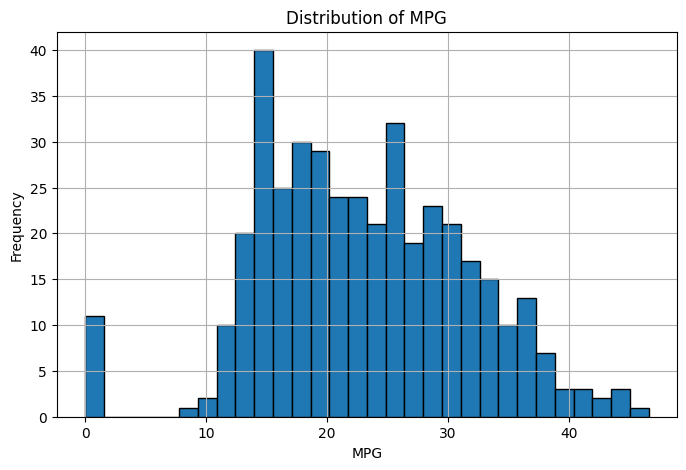

In [22]:
# However, this does not make much sense as there isn't MPG equal to 0.
# How about we plot the MPG column and check its distribution?

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df_cars['MPG'].hist(bins=30, edgecolor='black')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Distribution of MPG')
plt.show()

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

In [23]:
# If we observe the graph above, we can consider it in a way or another normally distributed.
# Therefore, we can impute the missing values using the mean.

mpg_mean = df_cars['MPG'].mean()
df_cars['MPG'] = df_cars['MPG'].fillna(mpg_mean)
print(f"Missing values in MPG after imputation: {df_cars['MPG'].isnull().sum()}")
print(f"Mean used for imputation: {mpg_mean}")

Missing values in MPG after imputation: 0
Mean used for imputation: 22.925615763546798


To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

In [24]:
# To compute the mean we need numeric values. However, the values in the dataframe are objects.
# Therefore, we need to change them to numerics so that we can compute them.

df_cars['MPG'] = pd.to_numeric(df_cars['MPG'], errors='coerce')
print(df_cars['MPG'].dtype)

float64


Now let's see what is the mean of the MPG column

In [25]:
# Now let's see what is the mean of the MPG column

mpg_mean = df_cars['MPG'].mean()
print(f"Mean of MPG column: {mpg_mean}")

Mean of MPG column: 22.925615763546798


We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [26]:
# Impute missing values in the MPG column using the mean value
df_cars['MPG'] = df_cars['MPG'].fillna(mpg_mean)
print(f"Missing values in MPG after imputation: {df_cars['MPG'].isnull().sum()}")
print(f"Mean used for imputation: {mpg_mean}")

Missing values in MPG after imputation: 0
Mean used for imputation: 22.925615763546798


### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

In [27]:
from sklearn.impute import SimpleImputer


What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [28]:
# Example: Impute missing values in the 'MPG' column using SimpleImputer with mean strategy

imputer = SimpleImputer(strategy='mean')
df_cars['MPG'] = imputer.fit_transform(df_cars[['MPG']])
print(df_cars['MPG'].isnull().sum())
print(df_cars.head())

0
                         Car   MPG Cylinders Displacement Horsepower Weight  \
0  Chevrolet Chevelle Malibu   0.0         8        307.0      130.0  3504.   
1          Buick Skylark 320  15.0         8        350.0             3693.   
2         Plymouth Satellite   0.0         8        318.0      150.0  3436.   
3              AMC Rebel SST  16.0         8                   150.0          
4                Ford Torino  17.0         8        302.0      140.0  3449.   

  Acceleration Model Origin  
0         12.0    70     US  
1         11.5    70     US  
2         11.0    70     US  
3         12.0    70     US  
4         10.5    70     US  


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





In [38]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
diabetics = load_diabetes()

# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
print(df_diabetics.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


### Outliers Visualization

In [ ]:
# Visualize the distribution and summary statistics of the MPG column using a boxplot

plt.figure(figsize=(8, 5))
plt.boxplot(df_cars['MPG'], vert=False)
plt.xlabel('MPG')
plt.title('Boxplot of MPG (Summary Statistics and Outliers)')
plt.show()

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

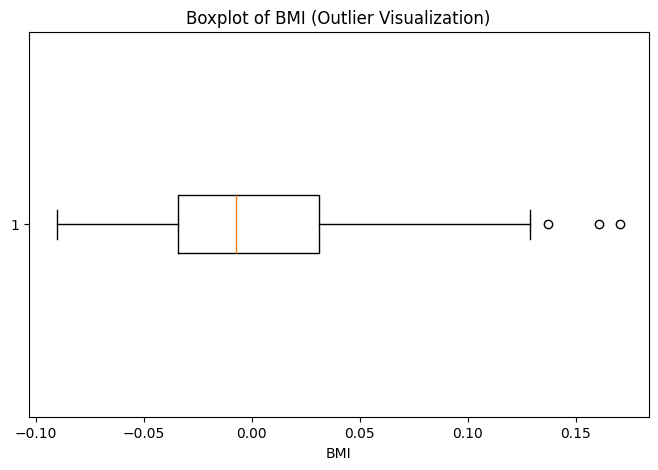

In [39]:
# Visualize outliers in the 'bmi' column using a boxplot

plt.figure(figsize=(8, 5))
plt.boxplot(df_diabetics['bmi'], vert=False)
plt.xlabel('BMI')
plt.title('Boxplot of BMI (Outlier Visualization)')
plt.show()

#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

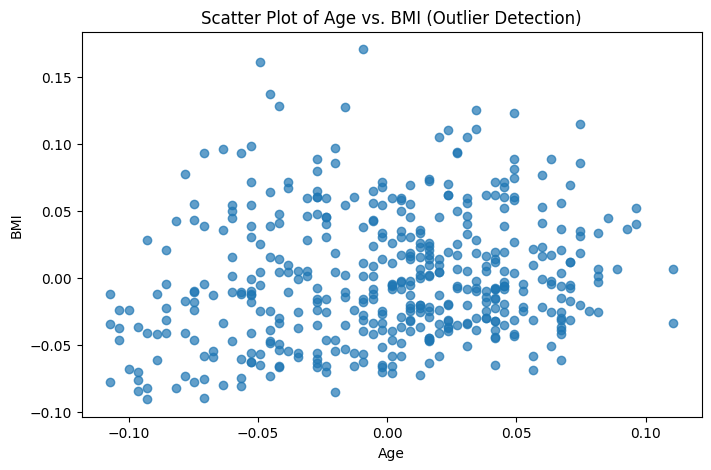

In [42]:
plt.figure(figsize=(8, 5))
plt.scatter(df_diabetics['age'], df_diabetics['bmi'], alpha=0.7)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatter Plot of Age vs. BMI (Outlier Detection)')
plt.show()

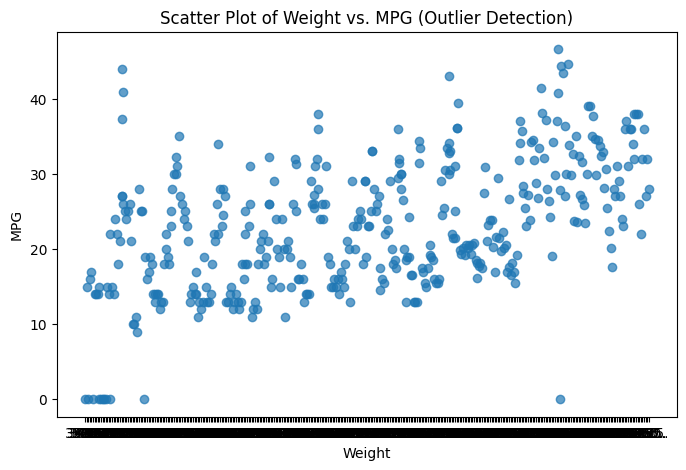

In [30]:
# Visualize outliers using a scatter plot (e.g., Weight vs. MPG)

plt.figure(figsize=(8, 5))
plt.scatter(df_cars['Weight'], df_cars['MPG'], alpha=0.7)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Scatter Plot of Weight vs. MPG (Outlier Detection)')
plt.show()

#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [44]:
# Detect outliers in the bmi column using Z-score

from scipy.stats import zscore

# Calculate Z-scores for the bmi column
df_diabetics['bmi_zscore'] = zscore(df_diabetics['bmi'])

# Identify outliers (e.g., Z-score > 3 or < -3)
outliers = df_diabetics[(df_diabetics['bmi_zscore'] > 3) | (df_diabetics['bmi_zscore'] < -3)]
print(f"Number of outliers detected (|z| > 3): {outliers.shape[0]}")
print(outliers[['bmi', 'bmi_zscore']])

Number of outliers detected (|z| > 3): 2
          bmi  bmi_zscore
256  0.160855    3.381781
367  0.170555    3.585718


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [46]:
# Identify rows where the absolute Z-score is greater than 2 (potential outliers)

outliers_z2 = df_diabetics[(df_diabetics['bmi_zscore'] > 2) | (df_diabetics['bmi_zscore'] < -2)]
print(f"Number of rows where |Z| > 2: {outliers_z2.shape[0]}")
print(outliers_z2[['age', 'bmi', 'bmi_zscore']])

Number of rows where |Z| > 2: 15
          age       bmi  bmi_zscore
32   0.034443  0.125287    2.634011
114  0.023546  0.110198    2.316775
130 -0.063635  0.096186    2.022199
138  0.034443  0.111276    2.339435
145 -0.041840  0.128521    2.701990
251 -0.052738  0.098342    2.067518
256 -0.049105  0.160855    3.381781
262 -0.016412  0.127443    2.679330
327  0.074401  0.114509    2.407414
332  0.030811  0.104809    2.203477
362  0.019913  0.104809    2.203477
366 -0.045472  0.137143    2.883268
367 -0.009147  0.170555    3.585718
403 -0.020045  0.097264    2.044859
405  0.048974  0.123131    2.588691


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [49]:
# Detect outliers in the MPG column using the IQR (Inter-Quartile Range) method

Q1 = df_diabetics['bmi'].quantile(0.25)
Q3 = df_diabetics['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df_diabetics[(df_diabetics['bmi'] < lower_bound) | (df_diabetics['bmi'] > upper_bound)]
print(f"Number of outliers detected using IQR: {outliers_iqr.shape[0]}")
print(outliers_iqr[['bmi', 'bmi_zscore']])

Number of outliers detected using IQR: 3
          bmi  bmi_zscore
256  0.160855    3.381781
366  0.137143    2.883268
367  0.170555    3.585718


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [50]:
# Define the upper and lower bounds for outliers using the IQR method

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print(f"Upper bound: {upper}")
print(f"Lower bound: {lower}")

Upper bound: 0.1294636406639386
Lower bound: -0.13244469328909578


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [52]:
# Remove outliers from the dataset using the IQR method

# Keep only rows within the IQR bounds for the 'bmi' column in df_diabetics
df_diabetics_no_outliers = df_diabetics[(df_diabetics['bmi'] >= lower) & (df_diabetics['bmi'] <= upper)]
print(f"Rows after removing outliers: {df_diabetics_no_outliers.shape[0]}")
print(df_diabetics_no_outliers.head())

Rows after removing outliers: 439
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  bmi_zscore  
0 -0.002592  0.019907 -0.017646    1.297088  
1 -0.039493 -0.068332 -0.092204   -1.082180  
2 -0.002592  0.002861 -0.025930    0.934533  
3  0.034309  0.022688 -0.009362   -0.243771  
4 -0.002592 -0.031988 -0.046641   -0.764944  
